In [1]:
!ls -al
! mkdir prognostic

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/My\ Drive/MLProjects/Prognostic/data/* /content/prognostic
! ls -al /content/prognostic

total 16
drwxr-xr-x 1 root root 4096 Aug 27 16:17 .
drwxr-xr-x 1 root root 4096 Aug 31 00:29 ..
drwxr-xr-x 1 root root 4096 Aug 28 16:06 .config
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
total 43904
drwxr-xr-x 2 root root     4096 Aug 31 00:40 .
drwxr-xr-x 1 root root     4096 Aug 31 00:40 ..
-rw------- 1 root root      429 Aug 31 00:40 RUL_FD001.txt
-rw------- 1 root root     1110 Aug 31 00:40 RUL_FD002.txt
-rw------- 1 root root      428 Aug 31 00

# Dataset Overview

## Data Load and Initial Sanity Check

In [2]:
from IPython.display import display # Allows the use of display() for DataFrames

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Defining the Column Names to be used to import Training and Test Datasets into Datafram
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', 's22', 's23' ]

df_train = pd.read_csv("prognostic/train_FD001.txt", sep=" ", header=None, names=col_names)
df_train.drop(['s22', 's23'], inplace=True, axis=1)

df_test=pd.read_csv("prognostic/test_FD001.txt", sep=" ", header=None, names=col_names)
df_test.drop(['s22', 's23'], inplace=True, axis=1)


display(df_train.head(3))
display(df_test.head(3))

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


In [3]:
#Loading the Ground Truth data for the Test Dataset i.e. the RUL data for the test dataset.
df_rul = pd.read_csv("prognostic/RUL_FD001.txt", sep=" ", header=None)
df_rul.drop([1], inplace=True, axis=1)
df_rul.columns = ['rul']
df_rul.head(3)

,rul
0,112
1,98
2,69


In [4]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 non-nu

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
id          13096 non-null int64
cycle       13096 non-null int64
setting1    13096 non-null float64
setting2    13096 non-null float64
setting3    13096 non-null float64
s1          13096 non-null float64
s2          13096 non-null float64
s3          13096 non-null float64
s4          13096 non-null float64
s5          13096 non-null float64
s6          13096 non-null float64
s7          13096 non-null float64
s8          13096 non-null float64
s9          13096 non-null float64
s10         13096 non-null float64
s11         13096 non-null float64
s12         13096 non-null float64
s13         13096 non-null float64
s14         13096 non-null float64
s15         13096 non-null float64
s16         13096 non-null float64
s17         13096 non-null int64
s18         13096 non-null int64
s19         13096 non-null float64
s20         13096 non-null float64
s21         13096 non-nu

None

We can see that both the train and test dataset doesnt have any null values, and all of them are numeric datatypes so no adjustements are required. This way we can conclude the data load and initial sanity checks.

We will now proceed to futher analyze data and look at the sensor values, data distribution and scaling of the individual features

## Data Analysis for One Engine

Let's now look at the plot of the features for one of the engines to develop some intuitions before we dig deeper into the analysis.

From the explanation of the dataset provided by the source, we already know that id, cycle, setting 1, setting 2 and setting 3 are some of the engine identifiers and the operational configurations and not really the sensor data so we will ignore these while performing analysis on the Sensor Data / Features

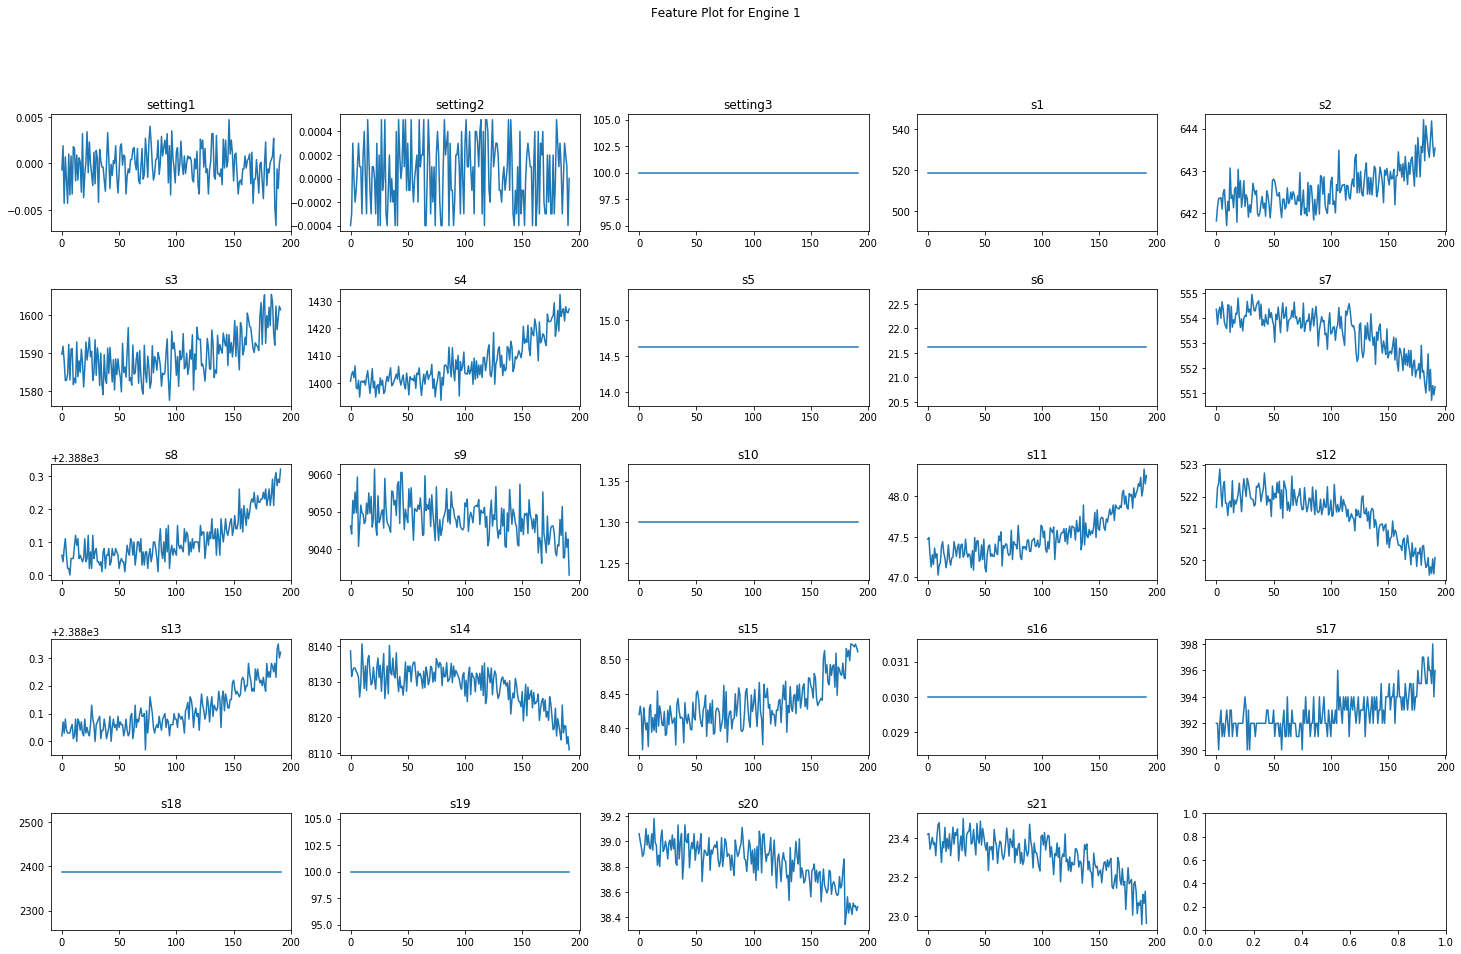

In [6]:
sensor_features = ['setting1', 'setting2', 'setting3', 's1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']

#Data Frame for Engine 1
df_engine1 = df_train[df_train['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name in zip(axes.flatten(), sensor_features):
  ax.plot(df_e1[feat_name])
  ax.set_title(feat_name)

So this tell's me that 
*   sensors s1, s5, s6, s10, s16, s18, s19
*   and operational settings parameter setting 3 

are almost constants across the various cycles for the turbine engine #1. As such these senors may not have a major role in the learning model which we will create

Let's verify the range of these senors for all the training data we have and check if the constant value is only for engine 1 or is this the case for all the engines.

In [7]:
constant_sensor_features = ['setting3','s1', 's5' , 's6', 's10', 's16', 's18', 's19']
display(df_train[constant_sensor_features].describe().T)

,count,mean,std,min,25%,50%,75%,max
setting3,20631.0,100.000000,0.000000e+00,100.00,100.00,100.00,100.00,100.00
s1,20631.0,518.670000,6.537152e-11,518.67,518.67,518.67,518.67,518.67
s5,20631.0,14.620000,3.394700e-12,14.62,14.62,14.62,14.62,14.62
s6,20631.0,21.609803,1.388985e-03,21.60,21.61,21.61,21.61,21.61
s10,20631.0,1.300000,4.660829e-13,1.30,1.30,1.30,1.30,1.30
s16,20631.0,0.030000,1.556432e-14,0.03,0.03,0.03,0.03,0.03
s18,20631.0,2388.000000,0.000000e+00,2388.00,2388.00,2388.00,2388.00,2388.00
s19,20631.0,100.000000,0.000000e+00,100.00,100.00,100.00,100.00,100.00


As we can see the minimum and maximum value for these sensors is constant. We will thus ignore these sensor readings from our analysis

Droping these columns from the original training and test dataframe, and updating the feature selection list

In [0]:
#sensor_features = ['setting1', 'setting2', 'setting3', 's1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']
#constant_sensor_features = ['setting3','s1', 's5' , 's6', 's10', 's16', 's18', 's19']

variable_sensor_features = ['setting1', 'setting2', 's2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']
df_train_1_vsensors = df_train.drop(constant_sensor_features, axis=1)
df_test_1_vsensors = df_test.drop(constant_sensor_features, axis=1)

In [12]:
#Checking the Original and Modified Dataframes columns
display(df_train_1_vsensors.head(3))
display(df_train.head(3))

,id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


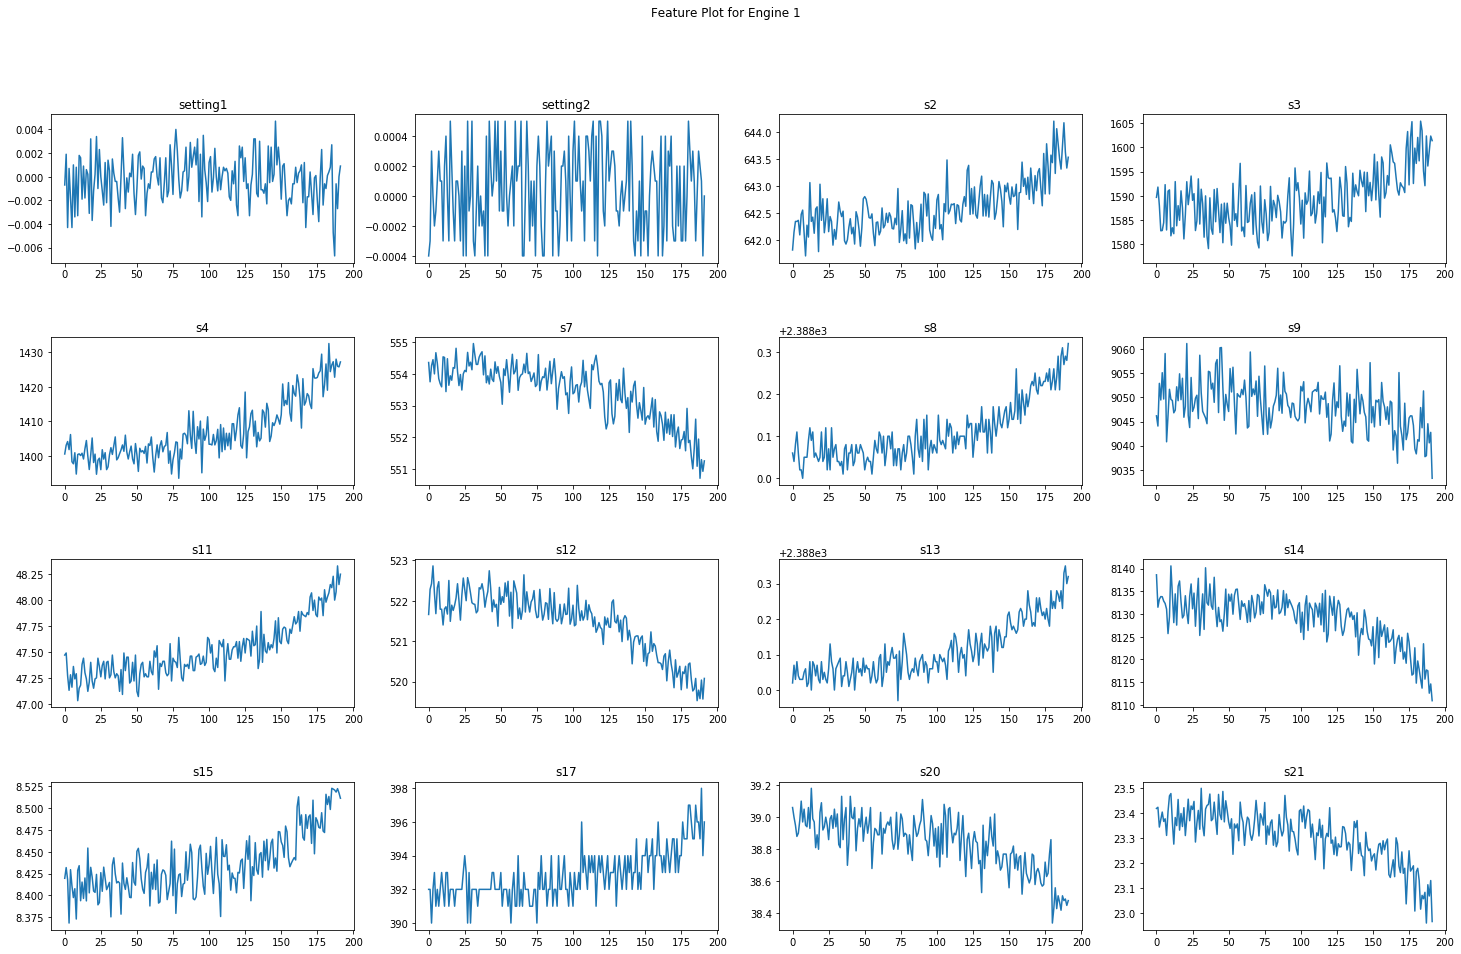

In [14]:
#Let's have a quick look at the engine 1 data with the updated sensor list
variable_sensor_features = ['setting1', 'setting2', 's2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

#Data Frame for Engine 1
df_engine1 = df_train_1_vsensors[df_train_1_vsensors['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name in zip(axes.flatten(), variable_sensor_features):
  ax.plot(df_engine1[feat_name])
  ax.set_title(feat_name)

We will now proceed with the Data Preprocessing and Feature Engineering. One thing to be noted is that there is a random noise in the sensor data introcued by the CMAPSS Simulator - so among other things we will also look to smoothen the sensor data series.

As a summary
* We have dropped the constant columns from the training and test dataset, and
* We know that smoothening of the time series data is required.
* df_train and df_test are the original dataframes
* df_train_1_vsensors and df_test_1_vsensors are the updated dataframe with the constant features already removed.
* sensor_features -> is the list of original sensor_features
  constant_sensor_feature -> is the list of the constant sensor features
  variable_sensor_features -> is the list of the non constant sensor features


# Data Processing and Feature Engineering

## Smoothening the Senor Data - Adding the Rolling Mean and Rolling Standard Deviation

In [0]:
def add_features(df_in, features, win):
  """
  Add rolling average and rolling standard deviation for sensors reading using the fixed rolling window size
  
  Args:
    df_in (dataframe)         : The input dataframe to be processed (training or test)
    rolling_win_size (int)    : The size of the rolling window
    features (list)           : List of features for which the rolling features will be calculated
    
  Returns:
    dataframe : contains the input dataframe with additional rolling mean and rolling standard deviation for each feature
  
  """
  
  features_rolling_mean = [n+'_av' for n in features]
  features_rolling_std = [n+'_std' for n in features]
  
  df_out = pd.DataFrame()
  
  ws = win
  #calculating rollings statistics for each machine id
  for m_id in pd.unique(df_in['id']):
    #get a subset of sensors data for each engine
    df_engine = df_in[df_in['id']==m_id]
    df_sub = df_engine[features]
    
    #get rolling mean for the subset
    av = df_sub.rolling(ws, min_periods=1).mean()
    av.columns = features_rolling_mean
    
    #get rolling standard deviation for the subset
    std = df_sub.rolling(ws, min_periods=1).std().fillna(0)
    std.columns = features_rolling_std
    
    #combining the newly calculated features to the engine subset
    new_ftrs = pd.concat([df_engine, av, std], axis = 1)
    
    #adding the new_ftrs and the original engine data as rows to output dataframe
    df_out = pd.concat([df_out, new_ftrs])
  
  return df_out

In [17]:
#Add extracted features to the training data
df_train_1_vsensors_fxrolling = add_features(df_train_1_vsensors, variable_sensor_features, 3)
df_train_1_vsensors_fxrolling.head()

,id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,setting1_av,setting2_av,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,setting1_std,setting2_std,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,-0.000700,-0.000400,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.000600,-0.000350,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.001838,0.000071,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,-0.001033,-0.000133,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.003113,0.000379,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,-0.000567,0.000000,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.003288,0.000300,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,-0.001833,0.000033,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.002501,0.000252,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101


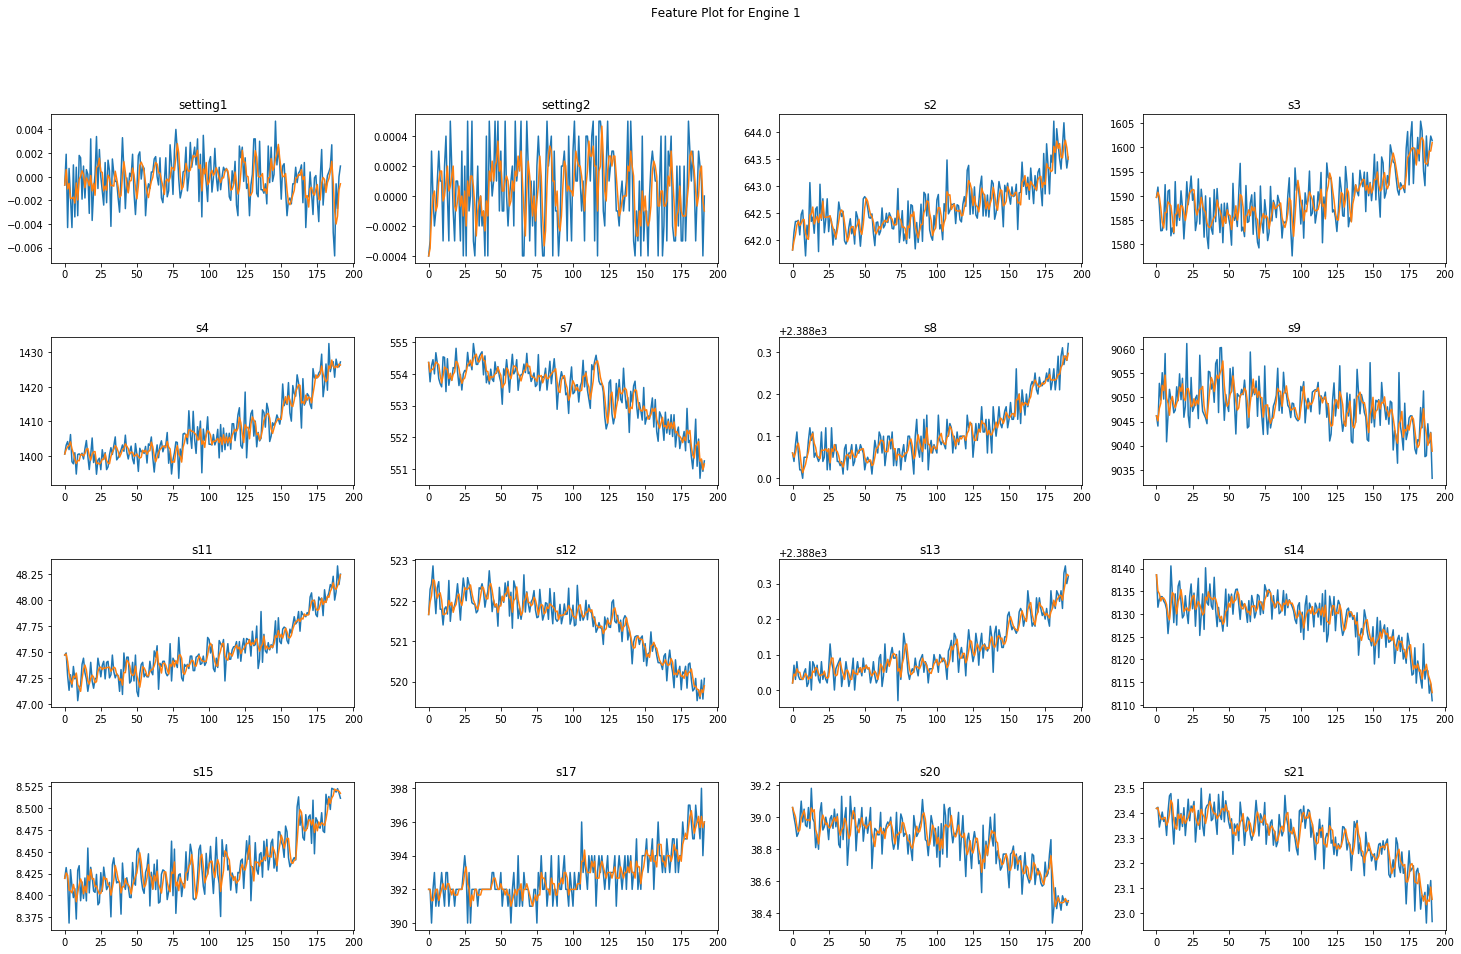

In [18]:
# Let's observe the smoothness in the data to ensure there is noting out of the ordinary.

#Let's have a quick look at the engine 1 data with the updated sensor list
sensor_features_avg = [n+'_av' for n in variable_sensor_features]

#Data Frame for Engine 1
df_e1 = df_train_1_vsensors_fxrolling[df_train_1_vsensors_fxrolling['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name, feat_avg_name in zip(axes.flatten(), variable_sensor_features, sensor_features_avg):
  ax.plot(df_e1[feat_name])
  ax.plot(df_e1[feat_avg_name])
  ax.set_title(feat_name)

## Add Regression and Classification Labels to Training Data

In [0]:
## HELPER FUNCTION TO ADD Regression and Classification Labels to the training data
def prepare_train_data(df_in, period):
  """
    Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
    Binary Classification Label: label_bnc = if ttf is <= the parameter period then 1, else 0 (values = 0 and 1)
          bnc = 1 is POSITIVE PREDICTION -> predicting failure i.e., maintenance required
          bnc = 0 is NEGATIVE PREDICTION-> predicting NO FAILURE i.e., maintenance not required
    Multi-class Classification Label : label_mcc = 2 if ttf <=0.5 * parameter period, 1 if ttf < = parameter period, else 0
          mcc = 2 -> predicting FAIURE very very soon i.e., urgent maintenance reqiired
          mcc = 1 -> predicting FAILURE i.e. maintenance required
          mcc = 0 -> predicting NO FAILURE i.e. no maintenance required
  """
  #Create Regression Label
  df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
  df_max_cycle.reset_index(level=0, inplace=True)
  df_max_cycle.columns=['id', 'last_cycle']
  
  #add TTT / RUL (time-to-failure, remaining useful life) as new column - the Regression Label
  df_in=pd.merge(df_in, df_max_cycle, on='id')
  df_in['rul']=df_in['last_cycle']-df_in['cycle']
  df_in.drop('last_cycle', inplace=True, axis=1)
  
  #Create Binary Classification Label
  df_in['label_bnc'] = df_in['rul'].apply(lambda x: 1 if x<=period else 0)
  
  #Create Multi Class Classification Label
  df_in['label_mcc'] = df_in['rul'].apply(lambda x: 2 if x <= 0.5*period else 1 if x<=period else 0)
  
  return df_in

In [20]:
df_train1_ppl = prepare_train_data(df_train_1_vsensors_fxrolling, 30)
display(df_train1_ppl.head())

,id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,setting1_av,setting2_av,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,setting1_std,setting2_std,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,-0.000700,-0.000400,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.000600,-0.000350,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.001838,0.000071,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,-0.001033,-0.000133,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.003113,0.000379,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,-0.000567,0.000000,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.003288,0.000300,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118,188,0,0
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,-0.001833,0.000033,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.002501,0.000252,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101,187,0,0


## Prepare the Test Data

In [0]:
## HELPER FUNCTION TO ADD Regression and Classification Labels to the Test Data
def prepare_test_data(df_test_in, df_truth_in, period):
  """
    Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data. All the other records / rows for an engine will be deleted.
    Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
    Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 0
  """
  
  df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
  df_tst_last_cycle.reset_index(level=0, inplace=True)
  df_tst_last_cycle.columns = ['id', 'last_cycle']
  
  df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')
  
  
  df_test_in = df_test_in[df_test_in['cycle']==df_test_in['last_cycle']]
  df_test_in.drop(['last_cycle'], axis=1, inplace=True)
  
  df_test_in.reset_index(drop=True, inplace=True)
  
  df_test_in = pd.concat([df_test_in, df_truth_in], axis = 1)
  
  #create binary classification label
  df_test_in['label_bnc'] = df_test_in['rul'].apply(lambda x: 1 if x <= period else 0)
    
  #create multi-class classification label
  df_test_in['label_mcc'] = df_test_in['rul'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
  
  return df_test_in

In [0]:
df_test_1_vsensors_fxrolling = add_features(df_test_1_vsensors, variable_sensor_features, 3)
df_test1_ppl = prepare_test_data(df_test_1_vsensors_fxrolling, df_rul, 30)

In [26]:
display(df_test1_ppl.head())

,id,cycle,setting1,setting2,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,setting1_av,setting2_av,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,setting1_std,setting2_std,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,-5.666667e-04,0.000300,642.440000,1584.696667,1399.330000,554.223333,2388.083333,9049.986667,47.350000,521.986667,2388.076667,8132.676667,8.411533,392.000000,38.973333,23.374733,0.001950,0.000173,0.437150,3.094614,1.475534,0.172143,0.005774,5.594375,0.104403,0.349333,0.020817,2.372706,0.009411,1.000000,0.145717,0.028070,112,0,0
1,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,4.336809e-19,-0.000200,642.680000,1587.293333,1408.673333,553.686667,2388.113333,9047.940000,47.536667,521.763333,2388.103333,8127.106667,8.439700,391.666667,38.893333,23.283367,0.002536,0.000173,0.153948,0.612563,4.747803,0.491664,0.061101,3.917742,0.119304,0.455448,0.011547,1.570234,0.015373,0.577350,0.090738,0.018825,98,0,0
2,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,-4.333333e-04,0.000300,643.060000,1589.626667,1414.756667,552.663333,2388.160000,9048.406667,47.703333,520.610000,2388.170000,8131.030000,8.442600,394.666667,38.723333,23.245433,0.001607,0.000100,0.180000,0.931146,3.580703,0.405010,0.030000,0.752152,0.153080,0.416173,0.036056,2.819699,0.026739,0.577350,0.188768,0.025085,69,0,0
3,4,106,0.0012,0.0004,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,-9.333333e-04,-0.000033,642.770000,1592.153333,1407.083333,553.406667,2388.153333,9055.720000,47.673333,521.353333,2388.123333,8134.256667,8.459267,394.000000,38.706667,23.261000,0.002013,0.000379,0.085440,2.901454,1.040016,0.713045,0.025166,5.073579,0.020817,0.480139,0.015275,0.822091,0.008220,1.732051,0.148436,0.010359,82,0,0
4,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,-1.200000e-03,-0.000200,642.566667,1591.820000,1414.560000,553.283333,2388.106667,9054.810000,47.536667,521.143333,2388.123333,8128.680000,8.435467,393.666667,38.760000,23.313167,0.002352,0.000200,0.256970,1.659277,5.144016,0.400042,0.011547,1.292556,0.187172,0.265769,0.025166,2.635356,0.013415,0.577350,0.085440,0.093289,91,0,0


In [0]:
df_test1_ppl.to_csv('prognostic/test_processed.csv', index=False)
df_train1_ppl.to_csv('prognostic/train_processed.csv', index=False)

In [28]:
! ls -al

total 24
drwxr-xr-x 1 root root 4096 Aug 31 00:40 .
drwxr-xr-x 1 root root 4096 Aug 31 00:29 ..
drwxr-xr-x 1 root root 4096 Aug 28 16:06 .config
drwx------ 3 root root 4096 Aug 31 00:40 drive
drwxr-xr-x 2 root root 4096 Aug 31 01:26 prognostic
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data


In [29]:
ls -al prognostic

total 58688
drwxr-xr-x 2 root root     4096 Aug 31 01:26 ./
drwxr-xr-x 1 root root     4096 Aug 31 00:40 ../
-rw------- 1 root root      429 Aug 31 00:40 RUL_FD001.txt
-rw------- 1 root root     1110 Aug 31 00:40 RUL_FD002.txt
-rw------- 1 root root      428 Aug 31 00:40 RUL_FD003.txt
-rw------- 1 root root     1084 Aug 31 00:40 RUL_FD004.txt
-rw------- 1 root root  2228855 Aug 31 00:40 test_FD001.txt
-rw------- 1 root root  5734587 Aug 31 00:40 test_FD002.txt
-rw------- 1 root root  2826651 Aug 31 00:40 test_FD003.txt
-rw------- 1 root root  6957759 Aug 31 00:40 test_FD004.txt
-rw-r--r-- 1 root root    73938 Aug 31 01:26 test_processed.csv
-rw------- 1 root root  3515356 Aug 31 00:40 train_FD001.txt
-rw------- 1 root root  9082480 Aug 31 00:40 train_FD002.txt
-rw------- 1 root root  4213862 Aug 31 00:40 train_FD003.txt
-rw------- 1 root root 10350705 Aug 31 00:40 train_FD004.txt
-rw-r--r-- 1 root root 15059885 Aug 31 01:27 train_processed.csv


In [0]:
! cp /content/prognostic/train_processed.csv /content/drive/My\ Drive/MLProjects/Prognostic/data/train_processed.csv
! cp /content/prognostic/test_processed.csv /content/drive/My\ Drive/MLProjects/Prognostic/data/test_processed.csv
